## Sentiment Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Packages από πριν
import numpy as np
import pandas as pd
from pandas.plotting._misc import scatter_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import FastMarkerCluster
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
plt.rcParams['figure.figsize'] = 15, 12

In [3]:
#!pip install spacy

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
import nltk
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [5]:
import nltk
nltk.download('words')
nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Read in data, select useful columns, and merge dataframes**

In [6]:
url1 = 'http://data.insideairbnb.com/greece/attica/athens/2021-12-23/data/listings.csv.gz'
df = pd.read_csv(url1)

In [7]:
url2 = 'http://data.insideairbnb.com/greece/attica/athens/2021-12-23/data/reviews.csv.gz'
reviews = pd.read_csv(url2)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
...,...,...,...,...,...,...
414666,53716424,520794884408001705,2021-12-19,190776336,Sofianna,"πολύ όμορφο σπίτι, άνετο και καθαρό. πολύ κον..."
414667,53717717,514969248984299307,2021-12-11,394174061,Χάρης,"Great place, fantastic view, perfect location!"
414668,53719103,520805312647593785,2021-12-19,357268636,Nikos,"Το σπίτι ήταν εξαιρετικό, πολύ άνετο και καθαρ..."
414669,53763239,521530297380840538,2021-12-20,190246646,Andriana,"Great location, great home, clean, warm, nice ..."


In [8]:
reviews.shape

(414671, 6)

In [9]:
reviews_trim = reviews[['listing_id', 'comments']]
reviews_trim1 = reviews_trim.dropna(axis=0, how='any')
reviews_trim2 = reviews_trim1.rename(columns = {'listing_id':'id'})
reviews_trim2.shape

(414214, 2)

In [10]:
listings_trim = df[['id','review_scores_rating']]
listings_trim1 = listings_trim.dropna(axis=0, how='any')

In [11]:
text = pd.merge(reviews_trim2, listings_trim1, on = 'id')

In [12]:
text.head()

,id,comments,review_scores_rating
0,10595,"The apartment was wonderful, fully equiped, be...",4.77
1,10595,Emmanouil was an excellent host. He provided u...,4.77
2,10595,"Manos is a very good host, he is kind and help...",4.77
3,10595,"Our stay in Emmanouil home was comfortable, qu...",4.77
4,10595,Fantastic accommodation very well located to v...,4.77


In [13]:
text_trim = text[['comments', 'review_scores_rating']]
df1 = text_trim.rename(columns = {'comments':'Review','review_scores_rating':'Rating'})
df1

,Review,Rating
0,"The apartment was wonderful, fully equiped, be...",4.77
1,Emmanouil was an excellent host. He provided u...,4.77
2,"Manos is a very good host, he is kind and help...",4.77
3,"Our stay in Emmanouil home was comfortable, qu...",4.77
4,Fantastic accommodation very well located to v...,4.77
...,...,...
414209,"πολύ όμορφο σπίτι, άνετο και καθαρό. πολύ κον...",5.00
414210,"Great place, fantastic view, perfect location!",5.00
414211,"Το σπίτι ήταν εξαιρετικό, πολύ άνετο και καθαρ...",5.00
414212,"Great location, great home, clean, warm, nice ...",5.00


In [14]:
df1[["Rating"]].value_counts()

Rating
4.91      16860
4.95      16809
4.88      16790
4.89      16340
4.94      15256
          ...  
1.57          7
3.14          7
3.20          5
2.75          4
1.50          2
Length: 145, dtype: int64

In [15]:
df1['Rating'].mean()

4.8096633865524625

In [17]:
def sentiment(rating):
  if rating>4.8:
    return 2
  elif rating>4.22 and rating<4.8:
    return 1
  else:
    return 0
df1['Sentiment'] = df1['Rating'].apply(sentiment)
df1.sort_values(by=['Rating'], ascending=False).head(10)

,Review,Rating,Sentiment
414213,When we first stumbled upon this flat on AirBn...,5.0,2
397736,Nous avons eu un accueil irréprochable !<br/>L...,5.0,2
397830,Best Apartment I have ever had. Such a great v...,5.0,2
397802,"Το σπίτι είναι σε πολύ βολική τοποθεσία, ακριβ...",5.0,2
397801,"Πολύ όμορφο διαμέρισμα με όλα τα βασικά, σε κα...",5.0,2
397800,Πολύ ωραίο και ευρύχωρο κατάλυμα κοντά στο κέν...,5.0,2
397799,.,5.0,2
397798,"Wspaniała gospodarz, pomimo trudności pogodowy...",5.0,2
397797,It was great!,5.0,2
397796,Great host ! The place is in a really nice str...,5.0,2


In [18]:
fig = go.Figure([go.Bar(x=df1.Sentiment.value_counts().index, y=df1.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [19]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review
  
def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

df1["Review"] = df1["Review"].apply(reviewParse).apply(clean_review) #Parse all the reviews for their punctuation and add it into a new column

df1.sort_values(by=['Rating'], ascending=False)

,Review,Rating,Sentiment
414213,when first stumbled upon flat airbnb seemed pe...,5.0,2
397736,nous avons eu un accueil irréprochable brlappa...,5.0,2
397830,best apartment i ever such great view very cle...,5.0,2
397802,το σπίτι είναι σε πολύ βολική τοποθεσία ακριβώ...,5.0,2
397801,πολύ όμορφο διαμέρισμα με όλα τα βασικά σε καλ...,5.0,2
...,...,...,...
280900,the host canceled reservation days arrival thi...,0.0,0
52551,the host canceled reservation days arrival thi...,0.0,0
344078,the host canceled reservation days arrival thi...,0.0,0
131246,the host canceled reservation day arrival this...,0.0,0


**Create a TFIDF matrix out of it**

In [20]:
docs = list(df1['Review'])[:7000] 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
ros = RandomOverSampler(random_state=42)

In [24]:
X_tfidf = tfidf_vectorizer_vectors.toarray()
Y_tfidf = df1['Sentiment'][:7000]

In [25]:
fig = go.Figure([go.Bar(x=Y_tfidf.value_counts().index, y=Y_tfidf.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

**Oversampling**

In [26]:
X, Y=ros.fit_resample(X_tfidf,Y_tfidf)

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

SEED=123

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

In [28]:
fig = go.Figure([go.Bar(x = Y.value_counts().index, y= Y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9912
Testing Accuracy score: 0.7827


In [ ]:
print(classification_report(y_test, y_pred_test_dt, target_names=["unsatisfied", "neutral/satisfied", "excited"]))

                   precision    recall  f1-score   support

      unsatisfied       0.91      0.99      0.95       702
neutral/satisfied       0.70      0.72      0.71       703
          excited       0.72      0.64      0.68       703

         accuracy                           0.78      2108
        macro avg       0.78      0.78      0.78      2108
     weighted avg       0.78      0.78      0.78      2108



In [ ]:
accuracy_dt=round(accuracy_score(y_test,y_pred_test_dt),4)
f1macro_dt=round(f1_score(y_test, y_pred_test_dt, average='macro'),4)
prec_dt=round(precision_score(y_test, y_pred_test_dt, average='macro'),4)
recall_dt=round(recall_score(y_test, y_pred_test_dt, average='macro'),4)


metrics_dict = {'Desicion Tree': [accuracy_dt, f1macro_dt, prec_dt, recall_dt]}
metrics_list = pd.DataFrame()
metrics_list['Desicion Tree'] = [accuracy_dt, f1macro_dt, prec_dt, recall_dt]
metrics_list.reset_index(inplace=True, drop=True)
metrics_list.index =['Accuracy', 'F1-Score', 'Precision','Recall' ]
metrics_list.T

,Accuracy,F1-Score,Precision,Recall
Desicion Tree,0.7827,0.7791,0.7778,0.7828


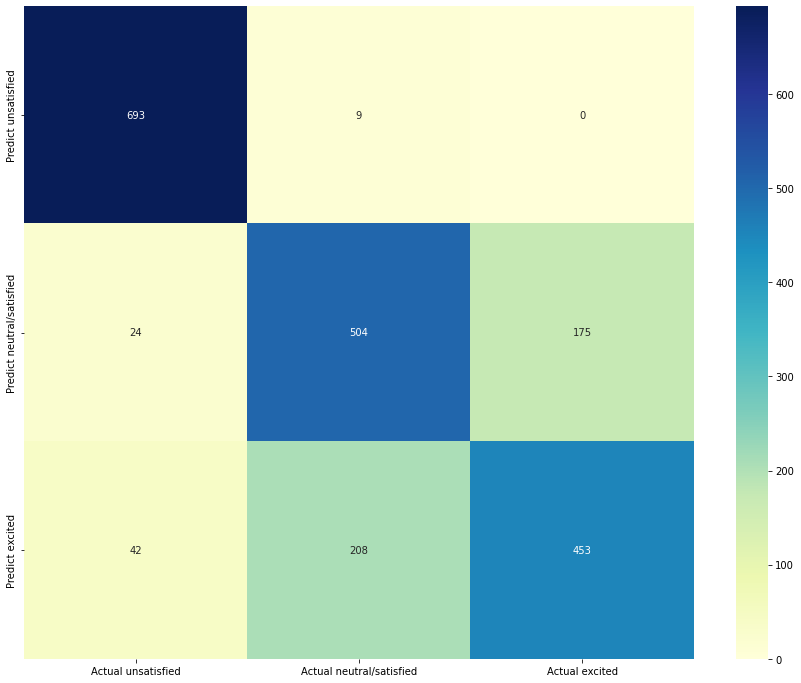

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_dt)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual unsatisfied', 'Actual neutral/satisfied', 'Actual excited'], 
                        index=['Predict unsatisfied', 'Predict neutral/satisfied', 'Predict excited'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train_gnb = gnb.predict(X_train)
y_pred_test_gnb = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 0.8943
Testing Accuracy score: 0.7509


In [ ]:
print(classification_report(y_test, y_pred_test_gnb, target_names=["unsatisfied", "neutral/satisfied", "excited"]))

                   precision    recall  f1-score   support

      unsatisfied       0.82      1.00      0.90       702
neutral/satisfied       0.76      0.55      0.64       703
          excited       0.66      0.70      0.68       703

         accuracy                           0.75      2108
        macro avg       0.75      0.75      0.74      2108
     weighted avg       0.75      0.75      0.74      2108



In [ ]:
accuracy_gnb=round(accuracy_score(y_test,y_pred_test_gnb),4)
f1macro_gnb=round(f1_score(y_test, y_pred_test_gnb, average='macro'),4)
prec_gnb=round(precision_score(y_test, y_pred_test_gnb, average='macro'),4)
recall_gnb=round(recall_score(y_test, y_pred_test_gnb, average='macro'),4)

metrics_list['Naive Bayes'] = [accuracy_gnb, f1macro_gnb, prec_gnb, recall_gnb]
metrics_list.T


,Accuracy,F1-Score,Precision,Recall
Desicion Tree,0.7827,0.7791,0.7778,0.7828
Naive Bayes,0.7509,0.7410,0.7488,0.7511


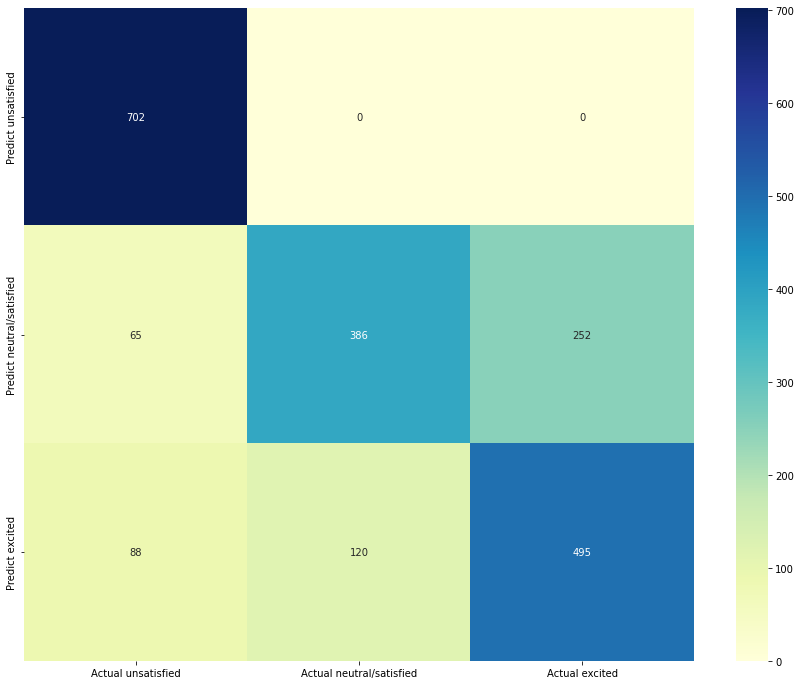

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_gnb)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual unsatisfied', 'Actual neutral/satisfied', 'Actual excited'], 
                        index=['Predict unsatisfied', 'Predict neutral/satisfied', 'Predict excited'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))

Training Accuracy score: 0.9366
Testing Accuracy score: 0.852


In [ ]:
print(classification_report(y_test, y_pred_test_lr,  target_names=["unsatisfied", "neutral/satisfied", "excited"]))

                   precision    recall  f1-score   support

      unsatisfied       0.92      0.98      0.95       702
neutral/satisfied       0.82      0.78      0.80       703
          excited       0.81      0.80      0.80       703

         accuracy                           0.85      2108
        macro avg       0.85      0.85      0.85      2108
     weighted avg       0.85      0.85      0.85      2108



In [ ]:
accuracy_lr=round(accuracy_score(y_test,y_pred_test_lr),4)
f1macro_lr=round(f1_score(y_test, y_pred_test_lr, average='macro'),4)
prec_lr=round(precision_score(y_test, y_pred_test_lr, average='macro'),4)
recall_lr=round(recall_score(y_test, y_pred_test_lr, average='macro'),4)

metrics_list['Logistic Regression'] = [accuracy_lr, f1macro_lr, prec_lr, recall_lr]
metrics_list.T

,Accuracy,F1-Score,Precision,Recall
Desicion Tree,0.7827,0.7791,0.7778,0.7828
Naive Bayes,0.7509,0.7410,0.7488,0.7511
Logistic Regression,0.8520,0.8506,0.8500,0.8521


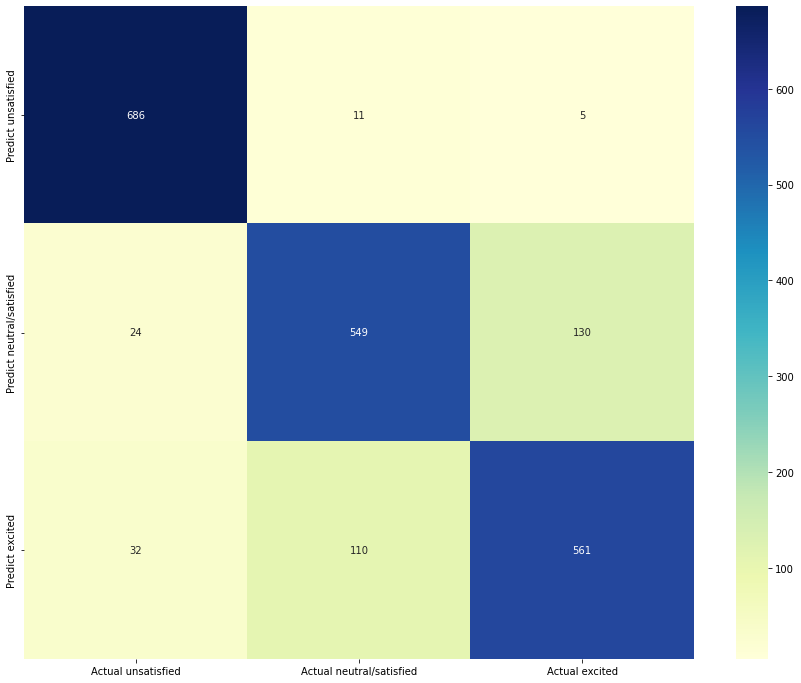

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_lr)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual unsatisfied', 'Actual neutral/satisfied', 'Actual excited'], 
                        index=['Predict unsatisfied', 'Predict neutral/satisfied', 'Predict excited'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_train_clf = clf.predict(X_train)
y_pred_test_clf = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 0.9912
Testing Accuracy score: 0.8406


In [ ]:
print(classification_report(y_test, y_pred_test_clf,  target_names=["unsatisfied", "neutral/satisfied", "excited"]))

                   precision    recall  f1-score   support

      unsatisfied       0.99      0.99      0.99       702
neutral/satisfied       0.77      0.76      0.76       703
          excited       0.77      0.77      0.77       703

         accuracy                           0.84      2108
        macro avg       0.84      0.84      0.84      2108
     weighted avg       0.84      0.84      0.84      2108



In [ ]:
accuracy_clf=round(accuracy_score(y_test,y_pred_test_clf),4)
f1macro_clf=round(f1_score(y_test, y_pred_test_clf, average='macro'),4)
prec_clf=round(precision_score(y_test, y_pred_test_clf, average='macro'),4)
recall_clf=round(recall_score(y_test, y_pred_test_clf, average='macro'),4)

metrics_list['Random Forest'] = [accuracy_clf, f1macro_clf, prec_clf, recall_clf]
metrics_list.T

,Accuracy,F1-Score,Precision,Recall
Desicion Tree,0.7827,0.7791,0.7778,0.7828
Naive Bayes,0.7509,0.7410,0.7488,0.7511
Logistic Regression,0.8520,0.8506,0.8500,0.8521
Random Forest,0.8406,0.8407,0.8407,0.8407


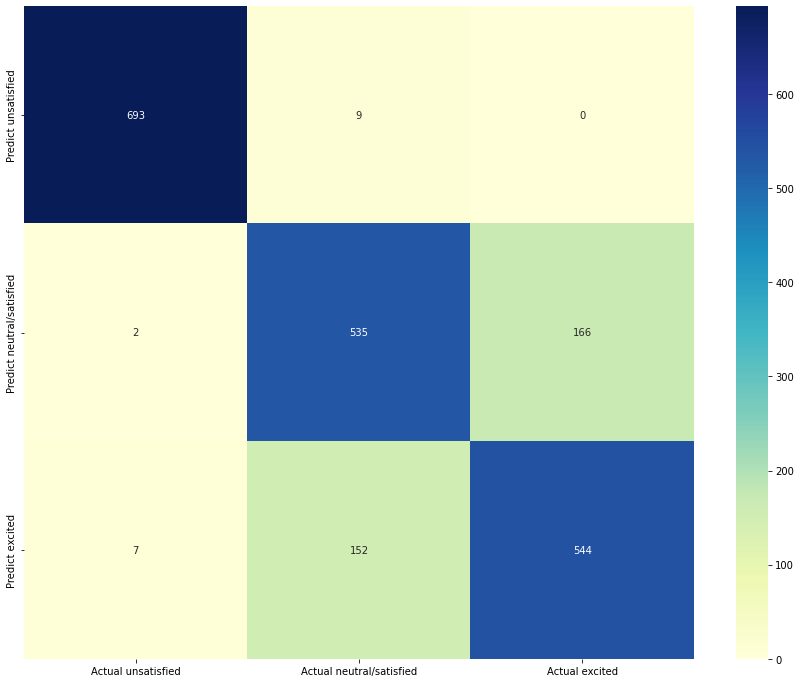

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_clf)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual unsatisfied', 'Actual neutral/satisfied', 'Actual excited'], 
                        index=['Predict unsatisfied', 'Predict neutral/satisfied', 'Predict excited'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Ensembling 

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Naive Bayes', gnb),
               ('Logistic Regression', lr),
               ('Random Forest', clf)
              ]

vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.983
Testing Accuracy score: 0.8591


In [ ]:
predictions = pd.Series(lr.predict(X), name="sentiment")
results = pd.concat([predictions],axis=1)
#results.to_csv("airbnb-review-sentiment.csv",index=False)
results

,sentiment
0,1
1,2
2,1
3,1
4,1
...,...
10531,1
10532,1
10533,1
10534,1
